In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import spearmanr
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.colors as mcolors

from bin import utils

In [2]:
fdata = ad.read_h5ad("./RNA/Multitime.clustered.h5")
cdata = ad.read_h5ad("./RNA/Multitime.guide.h5")

In [16]:
fdata_bin20 = ad.read_h5ad("./RNA/Multitime.annotation.sort.h5")

In [3]:
adata = fdata[fdata.obs["marker"] == '2-1'].copy()

In [21]:
adata_bin20 = fdata_bin20[fdata_bin20.obs["marker"] == '2-1'].copy()

In [22]:
adata_bin20

AnnData object with n_obs × n_vars = 567964 × 13177
    obs: 'marker', 'annotations', 'cov', 'cluster', 'spatial_cov'
    var: 'mt', 'mt-', 'gm', 'Rb', 'rik'
    uns: 'rank_genes_groups'
    obsm: 'spatial'

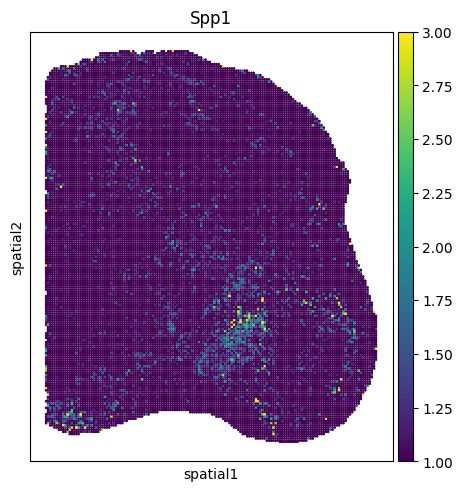

In [62]:
sq.pl.spatial_scatter(adata, color="Spp1", size=2, shape=None, library_id="spatial", vmax=3, vmin=1)

In [8]:
adata.var_names[adata.var_names.str.startswith("Cxcl")]

Index(['Cxcl1', 'Cxcl10', 'Cxcl12', 'Cxcl13', 'Cxcl14', 'Cxcl16', 'Cxcl17',
       'Cxcl2', 'Cxcl3', 'Cxcl5', 'Cxcl9'],
      dtype='object')

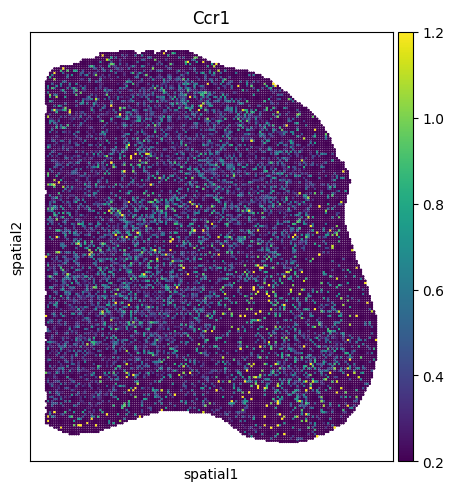

In [17]:
sq.pl.spatial_scatter(adata, color="Ccr1", size=2, shape=None, library_id="spatial", vmax=1.2, vmin=0.2)

In [18]:
hallmark_df = pd.read_csv("./GO/mh.all.v2023.2.Mm.symbols.gmt", sep="\t", index_col=None, header=None)
hallmark_df["Genes"] = [[gene for gene in hallmark_df.iloc[i, 2:]] for i in hallmark_df.index]
hallmark_df =  hallmark_df[[0, "Genes"]]
hallmark_df.columns = ["Hallmark", "Genes"]
hallmark_df.set_index("Hallmark", inplace=True)

In [19]:
hypoxia = hallmark_df.loc["HALLMARK_HYPOXIA"].Genes

In [20]:
sc.tl.score_genes(adata, gene_list=hypoxia, score_name="hypoxia_score")

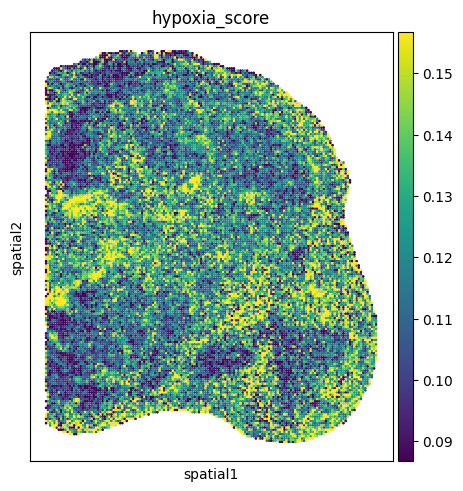

In [21]:
score_name = "hypoxia_score"
u = adata.obs[score_name].mean()
d = np.std(adata.obs[score_name])
sq.pl.spatial_scatter(adata, color=score_name, size=2, shape=None, library_id="spatial", vmax=u+d, vmin=u-d, cmap="viridis")

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


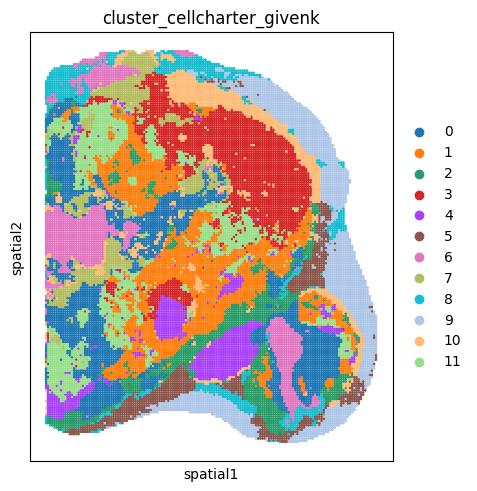

In [64]:
sq.pl.spatial_scatter(adata, color="cluster_cellcharter_givenk", size=2, shape=None, library_id="spatial")

In [73]:
adata.uns["rank_genes_groups"]["names"]

array([('Il31ra', 'Psap', 'H2-K1', 'Tyrobp', 'Spp1', 'Acta1', 'Jarid2', 'Slc2a1', 'Filip1l', 'Cox6a2', 'Hmox1', 'Nid1'),
       ('Cd44', 'Vcam1', 'S100a6', 'H2-T23', 'Krt18', 'Tnni2', 'Hexb', 'Slpi', 'Gphn', 'Ttn', 'Ccl5', 'Pcsk9'),
       ('Malat1', 'Sirpa', 'B2m', 'Serpina3g', 'Rhox5', 'Tnnt3', 'Il31ra', 'Krt8', 'Cdk8', 'Des', 'Lgals3', 'Rab39'),
       ...,
       ('Tnnt3', 'Filip1l', 'Eno1', 'Il31ra', 'Filip1l', 'Mmp12', 'Ucp1', 'C1qa', 'H2-T23', 'Pabpc1', 'Myh4', 'Acta1'),
       ('Des', 'AY036118', 'Tmem56', 'Filip1l', 'Cdk8', 'Gzmb', 'Hp', 'Actb', 'Slpi', 'S100a6', 'Cdk8', 'Cdk8'),
       ('Acta1', 'Gphn', 'Gapdh', 'Cdk8', 'Jarid2', 'Basp1', 'Fabp4', 'Acta1', 'Fblim1', 'Spp1', 'AY036118', 'Filip1l')],
      dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O'), ('10', 'O'), ('11', 'O')])

# Macrophage marker

In [105]:
Macro_marker = {
    #"Mono_CD14": ["Fcn1", "S100a9", "S100a8"],
    #"Mono_CD16": ["Fcgr3a", "Lst1", "Lilrb2"],
    #"Macro_INHBA": ["INHBA", "IL1RN", "CCL4"],
    "Macro_SPP1": ["Spp1", "Vegfa", "Mmp12", "Adam8"],
    "Macro_NLRP3": ["Nlrp3", "Ereg", "Il1b"],
    "Macro_LYVE1": ["Lyve1", "Pltp", "Selp"],
    "Macro_C1QC": ["C1qc", "C1qa", "Apoe"],
    # "Mast": ["KIT", "TPSAB1", "CPA3"],
}

In [84]:
print(fdata_bin20.obs["annotations"].unique().tolist())

['Macrophages', 'Malignant', 'exhausted T', 'Unknown T', 'effector T', 'DC', 'Others', 'Fibroblast', 'memory T', 'MuscleCell', 'Endothelial', 'NK', 'stem-like T', 'Epithelial']


In [93]:
macro_data = fdata_bin20[(fdata_bin20.obs["annotations"] == "Macrophages") & (fdata_bin20.obs["marker"] == '2-1')].copy()

In [94]:
macro_data.obs["annotations"]

cov
2-1_10010-10009    Macrophages
2-1_10010-10029    Macrophages
2-1_10010-10049    Macrophages
2-1_10010-10089    Macrophages
2-1_10010-10209    Macrophages
                      ...     
2-1_9989-9709      Macrophages
2-1_9989-9749      Macrophages
2-1_9989-9769      Macrophages
2-1_9989-9929      Macrophages
2-1_9989-9989      Macrophages
Name: annotations, Length: 235275, dtype: category
Categories (1, object): ['Macrophages']

In [113]:
for marker in Macro_marker:
    sc.tl.score_genes(macro_data, gene_list=Macro_marker[marker], score_name=f"{marker}_score")

In [114]:
m_marker_list = list(Macro_marker.keys())
macro_data.obs["m_type"] = (macro_data.obs.iloc[:, -4:][macro_data.obs.iloc[:, -4:].max(axis=1) > 0].apply(np.argmax, axis=1)).map(lambda x: m_marker_list[x])

In [116]:
macro_data.obs["m_type"].fillna("Macro_Unknown", inplace=True)

/tmp/ipykernel_36956/2902716949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  macro_data.obs["m_type"].fillna("Macro_Unknown", inplace=True)


In [118]:
macro_data.obs

,marker,annotations,cov,cluster,spatial_cov,Macro_SPP1_score,Macro_NLRP3_score,Macro_LYVE1_score,Macro_C1QC_score,m_type
cov,,,,,,,,,,
2-1_10010-10009,2-1,Macrophages,2-1_10010-10009,2.0,10000_10000,-0.013333,-0.006667,0.000000,0.646667,Macro_C1QC
2-1_10010-10029,2-1,Macrophages,2-1_10010-10029,2.0,10000_10000,-0.026667,0.000000,0.000000,0.313333,Macro_C1QC
2-1_10010-10049,2-1,Macrophages,2-1_10010-10049,2.0,10000_10000,-0.026667,-0.006667,-0.006667,0.313333,Macro_C1QC
2-1_10010-10089,2-1,Macrophages,2-1_10010-10089,2.0,10000_10000,-0.013333,-0.013333,-0.013333,0.193333,Macro_C1QC
2-1_10010-10209,2-1,Macrophages,2-1_10010-10209,1.0,10000_10200,-0.026667,0.000000,0.000000,0.313333,Macro_C1QC
...,...,...,...,...,...,...,...,...,...,...
2-1_9989-9709,2-1,Macrophages,2-1_9989-9709,2.0,9900_9700,-0.106667,-0.026667,-0.020000,1.920000,Macro_C1QC
2-1_9989-9749,2-1,Macrophages,2-1_9989-9749,2.0,9900_9700,-0.006667,-0.006667,-0.006667,0.000000,Macro_Unknown
2-1_9989-9769,2-1,Macrophages,2-1_9989-9769,2.0,9900_9700,-0.020000,0.000000,0.000000,0.233333,Macro_C1QC


In [178]:
c_map = adata.obs[["cluster_cellcharter_givenk", "spatial_cov"]].sort_values(by="spatial_cov").set_index("spatial_cov")["cluster_cellcharter_givenk"].to_dict()

In [181]:
m_df = macro_data.obs[["spatial_cov", "m_type"]].groupby("spatial_cov").value_counts().unstack().reset_index().fillna(0)

In [195]:
m_df["cluster"] = m_df["spatial_cov"].map(c_map)
m_df.dropna(inplace=True)
c_df = m_df.iloc[:, 1:].groupby("cluster").sum()
c_df = pd.concat([c_df.iloc[[2, 4, 7, 11]].sum(), c_df.iloc[[0, 1, 3, 5, 6, 8, 9, 10]].sum()], axis=1)
c_df.columns = ["hypoxia niches", "other"]

In [201]:
df_percentage

,hypoxia niches,other
m_type,,
Macro_C1QC,85.325229,87.671788
Macro_LYVE1,0.413217,0.625159
Macro_NLRP3,1.065748,0.800714
Macro_SPP1,4.470397,2.793808
Macro_Unknown,8.725410,8.108531


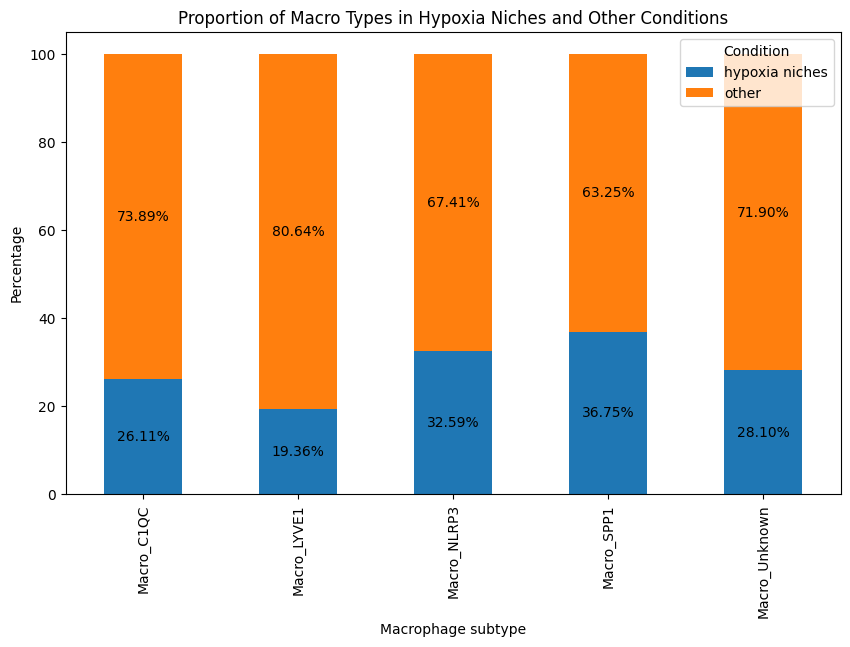

In [205]:
# Calculate the percentage
df_percentage = c_df.div(c_df.sum(axis=1), axis=0) * 100

# Plot the data
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Macrophage subtype')
ax.set_title('Proportion of Macro Types in Hypoxia Niches and Other Conditions')
ax.legend(title='Condition')

# Add percentage labels on top of the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

# Correlation with hypoxia

In [213]:
sc.tl.score_genes(adata, gene_list=hypoxia, score_name="hypoxia_score")
adata.obs

,marker,n_genes,n_counts,_scvi_batch,_scvi_labels,cluster_cellcharter_givenk,spatial_cov,hypoxia_score,Macro_SPP1_score,Macro_NLRP3_score,Macro_LYVE1_score,Macro_C1QC_score
10265-1,2-1,1882,4410,2,0,10,5700_400,0.123679,-0.189682,-0.051977,-0.067201,0.874867
6487-1,2-1,2212,5601,2,0,7,3600_600,0.105600,-0.314090,0.071806,0.123445,0.547196
6848-1,2-1,2634,7415,2,0,6,3800_700,0.080189,-0.023471,-0.044460,0.279369,0.420249
5049-1,2-1,2038,4789,2,0,6,2800_800,0.094678,-0.085349,0.064972,0.205765,0.876634
6490-1,2-1,2661,8278,2,0,6,3600_900,0.098423,-0.122344,-0.065700,-0.085732,0.613237
...,...,...,...,...,...,...,...,...,...,...,...,...
21779-1,2-1,5,7,2,0,9,12000_17800,0.915219,0.000000,0.000000,0.000000,0.000000
244-1,2-1,8,8,2,0,8,100_6300,0.000000,0.000000,0.000000,0.000000,0.000000
341,2-1,6,8,2,0,10,100_16000,0.000000,0.000000,0.000000,0.000000,0.000000
25725,2-1,7,7,2,0,9,14200_16400,0.000000,0.000000,0.000000,0.000000,0.000000


In [214]:
import statsmodels.api as sm

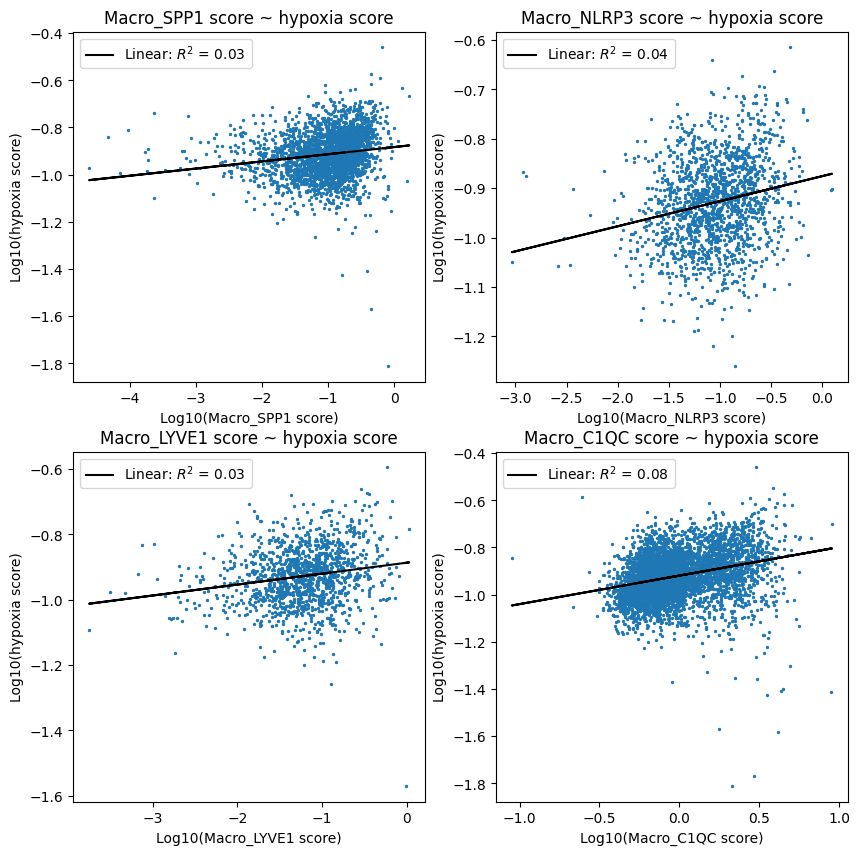

In [226]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for idx, marker in enumerate(Macro_marker):
    ax = axs[idx // 2, idx % 2]
    fdata_ = adata[(adata.obs[f"{marker}_score"] > 0) & (adata.obs["hypoxia_score"] > 0) & np.isin(adata.obs["cluster_cellcharter_givenk"], [2,7,11])]
    x = np.log10(fdata_.obs[f"{marker}_score"])
    y = np.log10(fdata_.obs["hypoxia_score"])
    ax.scatter(x, y, s=2)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    intercept, slope = model.params
    r_squared = model.rsquared
    ax.plot(x, intercept + slope * x, color='black', label=f'Linear: $R^2$ = {r_squared:.2f}')

    ax.set_title(f"{marker} score ~ hypoxia score")
    ax.set_xlabel(f"Log10({marker} score)")
    ax.set_ylabel('Log10(hypoxia score)')
    ax.legend()
plt.show()

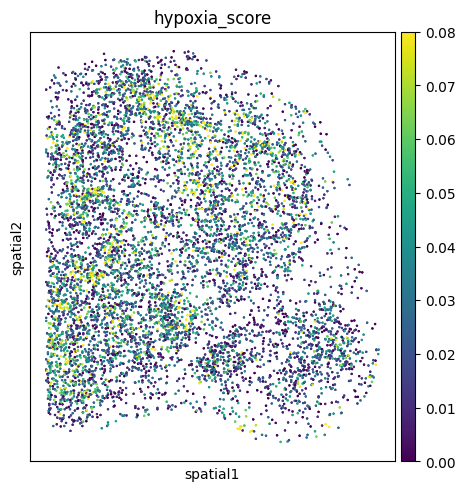

: 

In [231]:
sq.pl.spatial_scatter(macro_data[macro_data.obs["m_type"] == "Macro_SPP1"], vmax=0.08, vmin=0.0, color="hypoxia_score", size=2, shape=None, library_id="spatial")